# What is data storytelling?  

Let's start with some basic definitions:

**Story**

A story is a narrative, either true or fictitious, and is used to communicate an idea to the audience based on a selected theme.  
It can be spoken, written or come in other forms of media such as a movie.  

**Storytelling**

Storytelling is the way we convey key messages to the audience through stories that resonate with them.  

**Data storytelling**

Data storytelling is a powerful combination of data and narrative to help our audience and stakeholders understand complex information, and then make informed decisions.  

To be successful, you need to craft a narrative around your data, and present it in a way that is both easy to understand and resonates with your audience.

# Objective of data storytelling 

We want to be able to turn raw data into actionable insights, so that stakeholders can make informed decisions and drive positive change.  

# Getting started with Storytelling

There are some easy techniques to get started with data storytelling.
A good place to start is with the "H and 5 W questions" - Who, What, When, Where, Why, How.  

We will use: 
- "Who" and "What" to define the scope of our stories and data  
- "When" and "Where" to set the context
- "How" to determine the presentation of our data
- "Why" to structure and streamline our stories

In this notebook, we explore each of these with some examples:  
- [1 Scoping stories](#1-Scoping-stories)
    - [1.1 Scoping with "Who" questions](#1.1-Scoping-with-"Who"-questions)
    - [1.2 Scoping with "What" questions](#1.2-Scoping-with-"What"-questions)
- [2 Setting the story context](#2-Setting-the-story-context)
    - [2.1 Setting the context with "When"](#2.1-Setting-the-context-with-"When")
    - [2.2 Setting the context with "Where"](#2.2-Setting-the-context-with-"Where")  
    
Continue on with the following notebooks:  
- [02-Storytelling-2.ipynb](02-Storytelling-2.ipynb): Story presentation with "How" question
- [03-Storytelling-3.ipynb](03-Storytelling-3.ipynb): Structuring the story

## 1 Scoping stories

The universe is huge and we can't take everything and put them into a story.  

> KISS: Keep it Short and Simple

Therefore, we use scope to define the boundary and parameters as way to keep our story concise.    
By keeping only the necessary details, we will improve the clarity and effectiveness of the message that we want to deliver with the story.  

### 1.1 Scoping with "Who" questions  

In literature, the "who" refers to the characters in the stories. 
However, in data stories, it refers to who our audience is.  
We need to know who our audience is and what they do.  This will help to set the premise for our data stories and also determine the mode of delivery.    

**Audience's nature of business**  
If we are analysts working in a bank, our stories will revolve around financial topics such as profits and losses, interest rates and spreads, risks etc.  
In a pharmaceutical company, our stories may revolve around clinical trial results, drug life-cycle management, drug sales forecast etc.  
For retailers, we will look at the sales, trends and profitability.

**Type of users**  
Within the company itself, we should also identify which group of users we are addressing. For business groups, they are interested in the key business metrics that will help them make informed decisions. For technical group or the analysts, they are probably interested in deeper diving into how key metrics are derived. 

Apart from the difference in the level of detail in the stories, the way we present the stories to these groups can also vary. 
The business users may be happy with reports or interactive dashboards. On the other hand, we can present our stories in Jupyter Notebooks to the technical/analyst group of users.

<img src="https://data.atoti.io/atoti-academy/images/storytelling-with-atoti/1_1_audiences_views.png" />

**Interest of users**  
In a company, there are many departments and teams. Each of them has their own focus and interests. These again, set the boundaries for our stories.  
For instance, the sales team of the pharmaceutical company will have a higher interest in the drug sales forecast than the details of the clinical trials. A summary of the success rate for the trials and its performance against competitors will probably suffice for the sales team.    

### 1.2 Scoping with "What" questions  

There are many "What" questions that we can have:  
- [What is the purpose of the stories we are crafting?](#1.2.1-What-is-the-purpose-of-the-stories-we-are-crafting?)  
- [What type of data do we already have?](#1.2.2-What-type-of-data-do-we-already-have?)  
- [What type of data do we need in addition to what we already have?](#1.2.3-What-type-of-data-do-we-need-in-addition-to-what-we-already-have?)


#### 1.2.1 What is the purpose of the stories we are crafting?  

We mentioned that the aim of data storytelling is to help the stakeholders make informed decisions. 
So, we need to understand these decisions before we can prepare the necessary insights.  

For instance, let's assume our stakeholder is a retailer who would like to cut costs and increase profit. There are many ways to achieve the same objective and this is where we get creative.  

To cut cost, the stakeholder may consider:
- dropping some products from his/her inventory
- changing their shipment company to one that provides more competitive rates   

To increase profit, the stakeholder may consider:  
- leveraging the pricing model for bulk purchases by increasing stock for fast selling products
- running marketing events such as discounts for loyal shoppers or discount sales  
- implementing commission systems for employees based on sales targets 

Now we know which decisions the stakeholder might consider, we should have an idea of the information we need to provide him/her.    
For instance, in order to drop products from the inventory, we need to know the performance of each product. 
Cleary, this might lead us to another question: how does the stakeholder define performance?
Let's say in this case, performance is volume sold vs its profit margin.  

And in order to make decisions about changing the shipment company, we should find out the volume of shipment vs the rates charged by the company in comparison to the other shipment companies. 

#### 1.2.2 What type of data do we already have?

> **You can't make bricks without straws**  

Our analysis can only be conducted with the data we have, so we need to make sure we have the correct dataset.  
As a step forward, we try to gather as many insights as we can with the data we have on-hand and align them with our objectives.   
This should help us recognize the gap between what we have and what we want to have in our data.  

**Data Exploration**

This is the stage when we try to analyze the data and find as much useful insights as we can from what we have.  

💡To illustrate and provide data for our story we will use a script to create a multi-dimensional data cube using [Atoti](https://www.atoti.io/). Refer to the [training material](../03-Atoti/01-intro-Atoti.ipynb) under 03-Atoti if you are unfamiliar with Atoti.  

In [1]:
import atoti as tt
from utils import setup

In [2]:
# instantiating our instance and creating the Atoti cube with our data
session, cube = setup.create_app()
# aliasing cube properties
h, l, m = cube.hierarchies, cube.levels, cube.measures

session.tables.schema

```mermaid
erDiagram
  "Orders" {
    _ String PK "OrderId"
    _ LocalDate "OrderDate"
    _ int "QuantitySold"
    _ double "SellingPricePerUnit"
    _ String "ShipperName"
    _ String PK "ProductId"
    _ String "EmployeeId"
    _ String "CustomerId"
  }
  "Products" {
    _ String PK "ProductId"
    _ String "ProductName"
    _ String "ProductCategory"
    _ String "Supplier"
    nullable double "PurchasingPricePerUnit"
  }
  "Customers" {
    _ String PK "CustomerId"
    _ String "CompanyName"
    _ String "Address"
    _ String "City"
    _ String "PostalCode"
    _ String "Region"
    _ String "Country"
    _ String "Subregion"
    _ String "Phone"
  }
  "Shippers" {
    _ String PK "Shipper"
    _ String PK "Interval"
    nullable double "Rate"
  }
  "Employees" {
    _ String PK "EmployeeId"
    _ String "EmployeeName"
    _ String "EmployeeZone"
    _ String "EmployeeCountry"
    _ String "EmployeeCity"
  }
  "HistoricalPrices" {
    _ String PK "ProductId"
    nullable double[] "HistoricalPrice"
  }
  "Orders" }o--o| "Customers" : "`CustomerId` == `CustomerId`"
  "Orders" }o--o| "Employees" : "`EmployeeId` == `EmployeeId`"
  "Orders" }o--o| "Products" : "`ProductId` == `ProductId`"
  "Orders" }o..o{ "Shippers" : "`ShipperName` == `Shipper`"
  "Products" }o--o| "HistoricalPrices" : "`ProductId` == `ProductId`"
```


In our context, we are looking at sales data and we will start by exploring this.
The data schema allows us to have a high-level understand of the data we have and the relationship between each table.  

At a glance, we should be able to provide these information about our current situation e.g.:
- Number of orders 
- Sales of volume product
- Profit by product  

It will be much easier if we can visualize the data to have a better gist of how we can better address our needs.  
So, let's leverage Atoti's interactive widget to build something that reflects our current situation.  

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
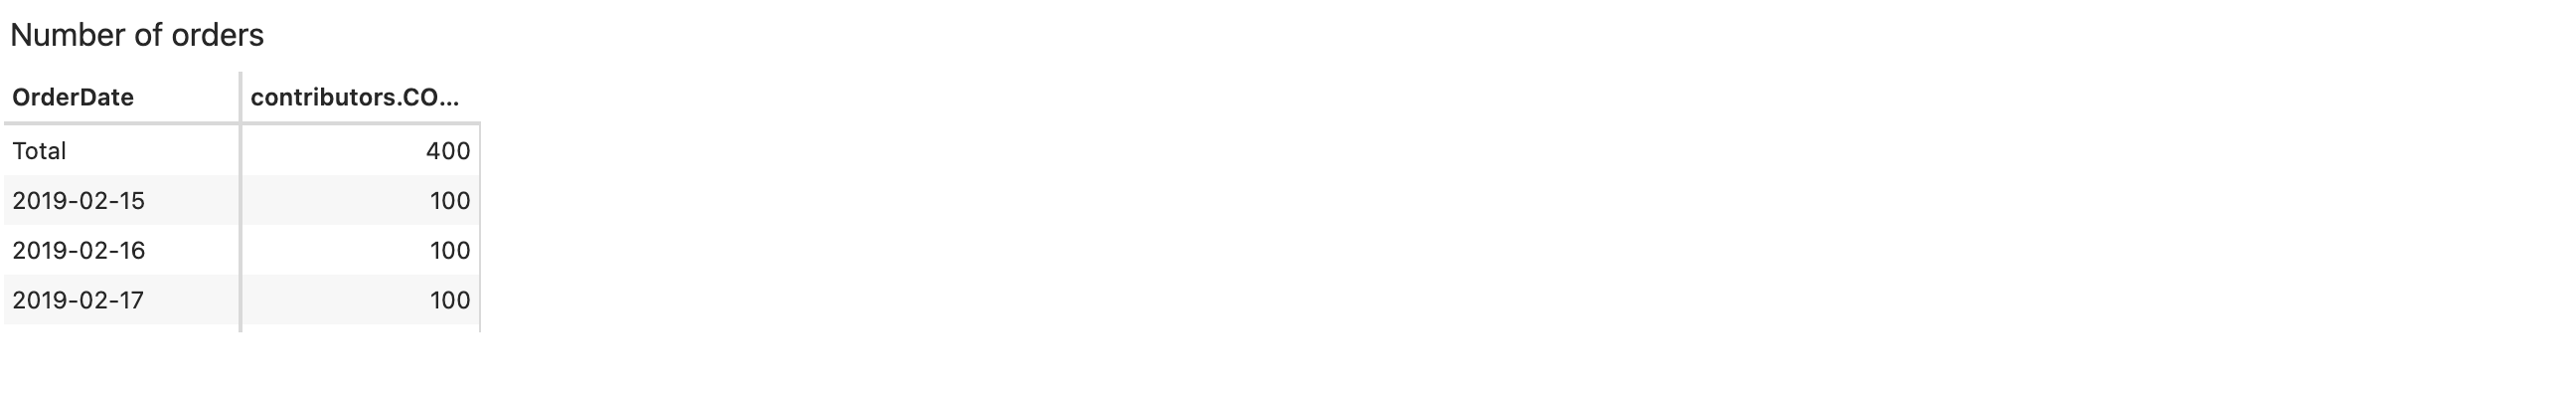

In [3]:
session.widget

We can see from the table that we have the same number of orders each day. 
We can add more depth to the query by adding in other factors into the query such as the country of the customer.
This will allow us to investigate which countries contribute most to the overall sales figures.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
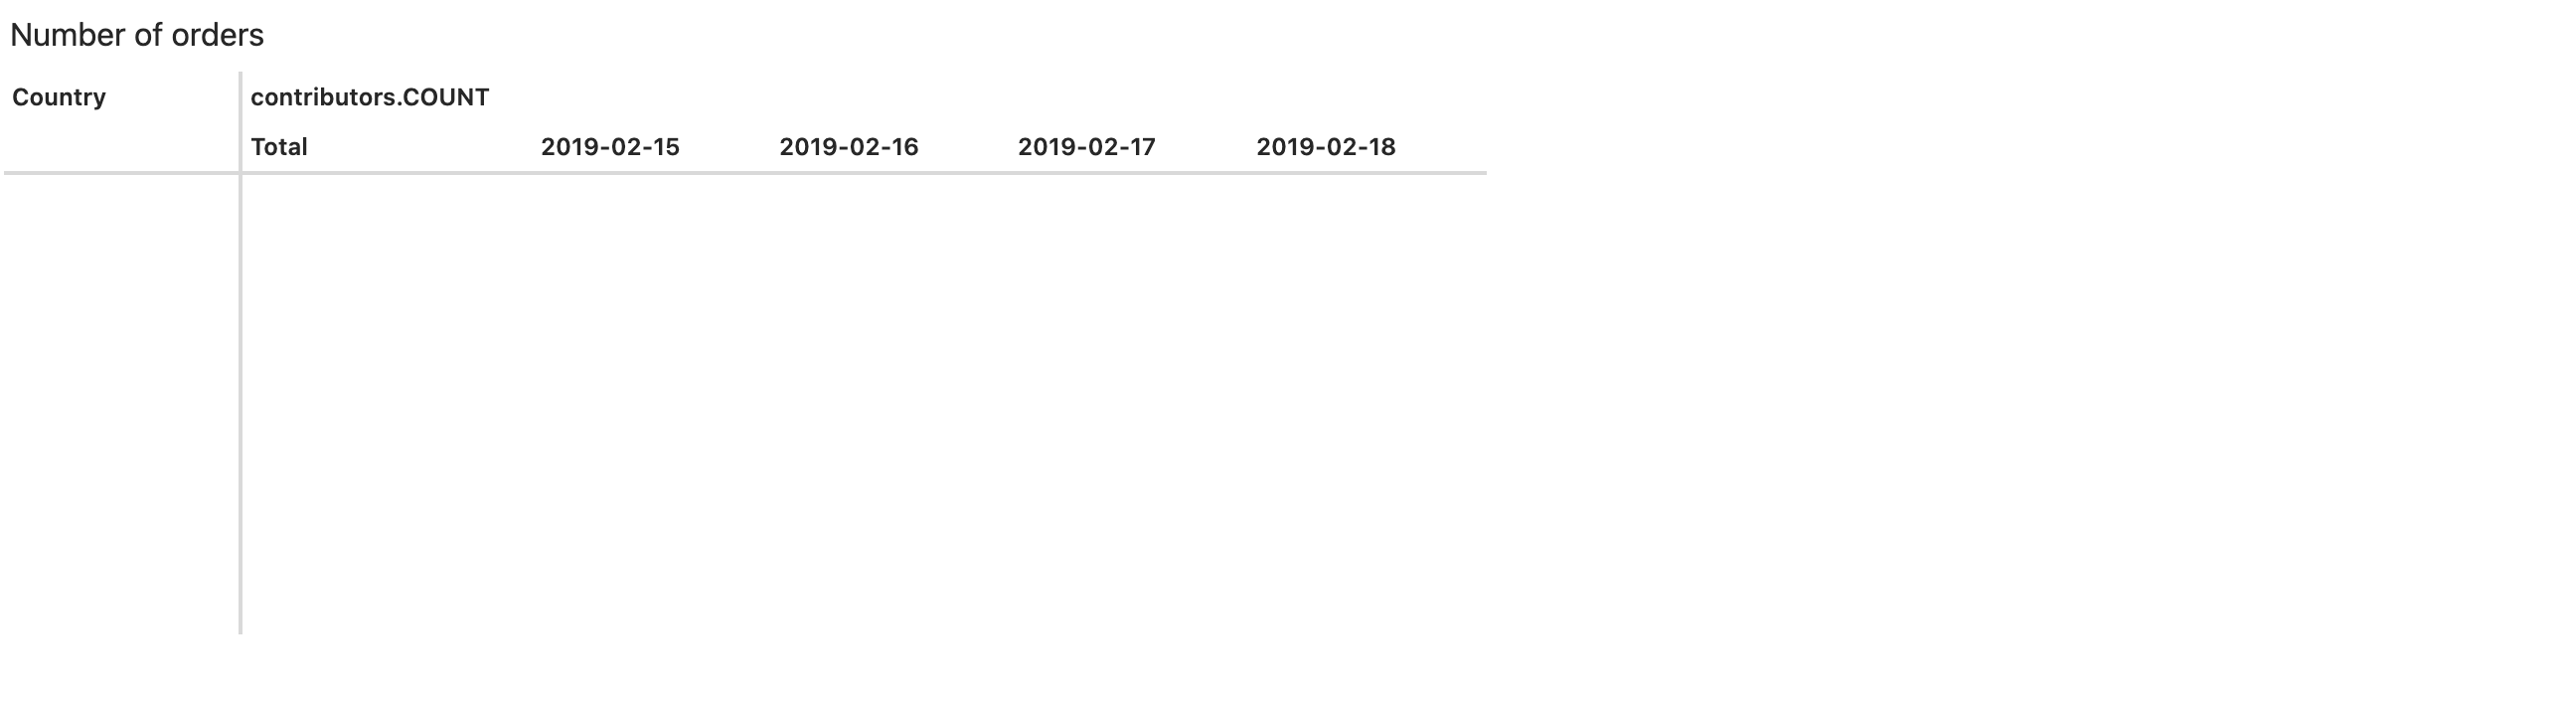

In [4]:
session.widget

And, we can go further, as overall orders is not the same as profit.
It will also be interesting to see which country yields the highest profit.  
Feel free to use the Atoti content editor on the left navigation bar to add the measures or hierarchies that may interest you.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
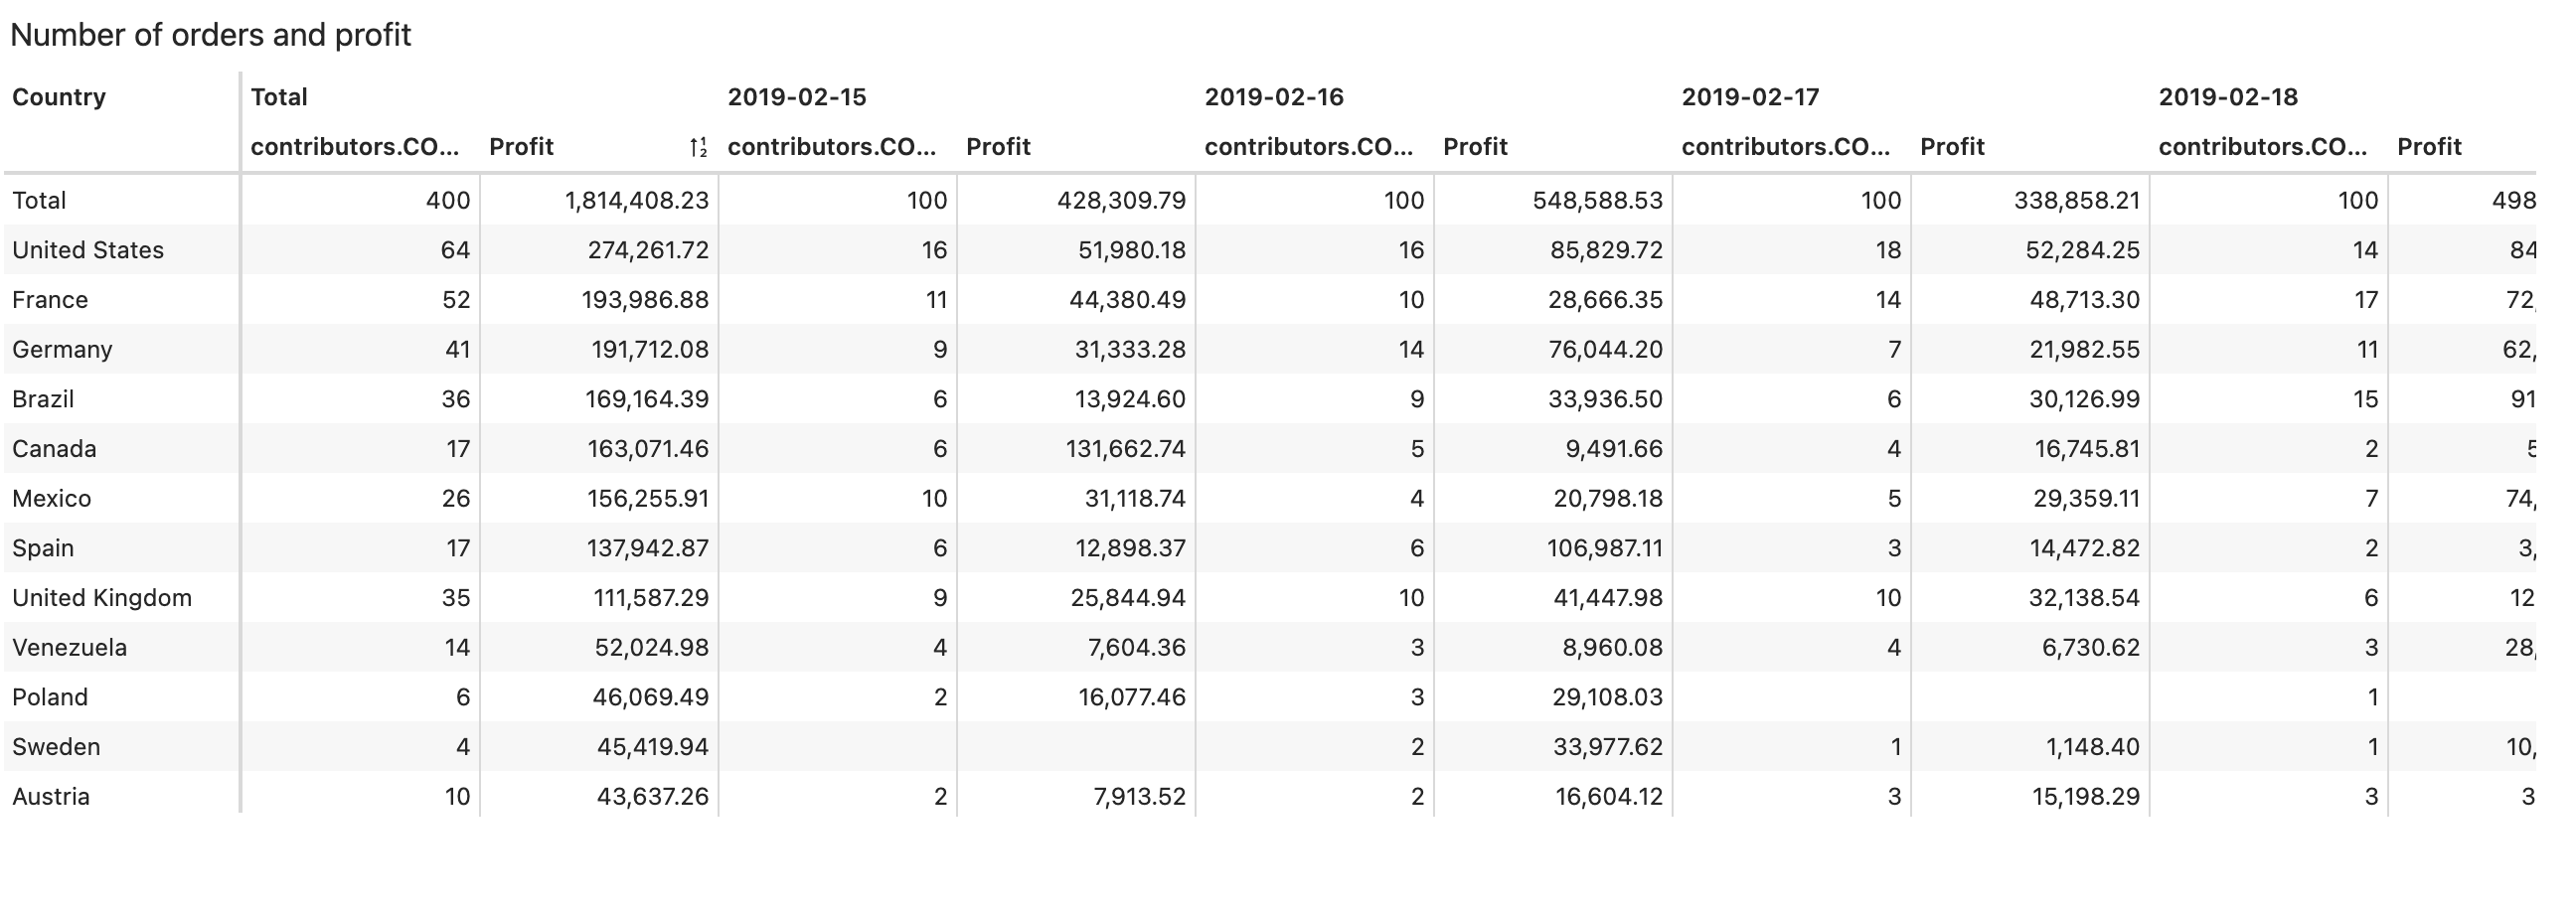

In [5]:
session.widget

#### 📐Exercise  

Try deriving other insights from the given data set.  

#### 📖 Solution

Uncomment and run the next two cells for different insights.  

In [6]:
# session.widget

In [7]:
# session.widget

During the exploration stage, you should play around the data from different perspectives. You might discover some interesting insights and further routes to explore.
We can discard ideas based on its relevancy later on as we start to structure our story.  

#### 1.2.3 What type of data do we need in addition to what we already have?  

There is a high chance that we need more information to support our findings.  
We may discover this need upfront or later on. 

**Upfront need for additional data**  
Usually, these needs are due to requirements triggered by the stakeholders.  

One example could be that the stakeholder informs us that he/she wants to make use of machine learning to perform some predictions. So, we can expect some output from the machine learning model. The challenge in this case is how to translate these predictions into useful business metrics for the stakeholder.   

Another example is that the stakeholder wants to know how the company is positioned against its competitors. So in this case, we can consider purchasing data such as competitors' pricing and sales volume from third part data provider.

**Discovering need for additional data later on**  

The findings of our data exploration may lead to the conclusion that we do not have enough information to provide meaningul insights. 

Let's compare two products.
One has low profit margin but high sales volume while the other has a high profit margin but low sales volume. 
Should we discontinue one, both or neither of these products?  
In this case, we can easily compute the sales and profit margin of each product from the existing data. 

But, we might need more data in order to make a properly informed decision.
For instance, it would be good to know the defect rate and number of returns for each of the products.

The rate of defects is an important metric because if a product is frequently refunded for its defect, it will incur additional costs and reputational risks.  
Such information can be captured by enhancing the existing systems or integrating additional system into the data pipelines.


**Deriving data to fill the gaps**  

Earlier on, we talked about using machine learning algorithms to perform predictions. 
For instance, we can use machine learning to adjust the selling prices of our product in order to stay competitive against our competitors. We are not going into the details of such algorithm in this training. If you would like more details, you can check up this example on [pricing simulation around product class](https://github.com/atoti/notebooks/blob/main/notebooks/01-use-cases/other-industries/pricing-simulations-around-product-classes/main.ipynb).  

As well as integrating data from other sources, it's also possible to create new measures and investigate what we already have.
Let's take a quick look at data deriving by performing a series of aggregations on existing data.  
Let's say we want to know total sales revenue. We already have the `QuantitySold` and `SellingPricePerUnit`.  We are able to derive our sales revenu by multiplying the two measurements and summing them up.  

💡Refer to the [training material](../03-Atoti/01-intro-Atoti.ipynb) under 03-Atoti if you are unfamiliar with operations of Atoti.  

From here, we can continue with aggregation to compute profit margins.

In [8]:
# Compute sales and profit margin
m["Sales"] = tt.agg.sum_product(
    m["QuantitySold.SUM"],
    m["SellingPricePerUnit"],
    scope=tt.OriginScope(l["ProductId"], l["OrderId"]),
)

m["ProfitMargin"] = m["Profit"] / m["Sales"]
m["ProfitMargin"].formatter = "DOUBLE[0.00%]"

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
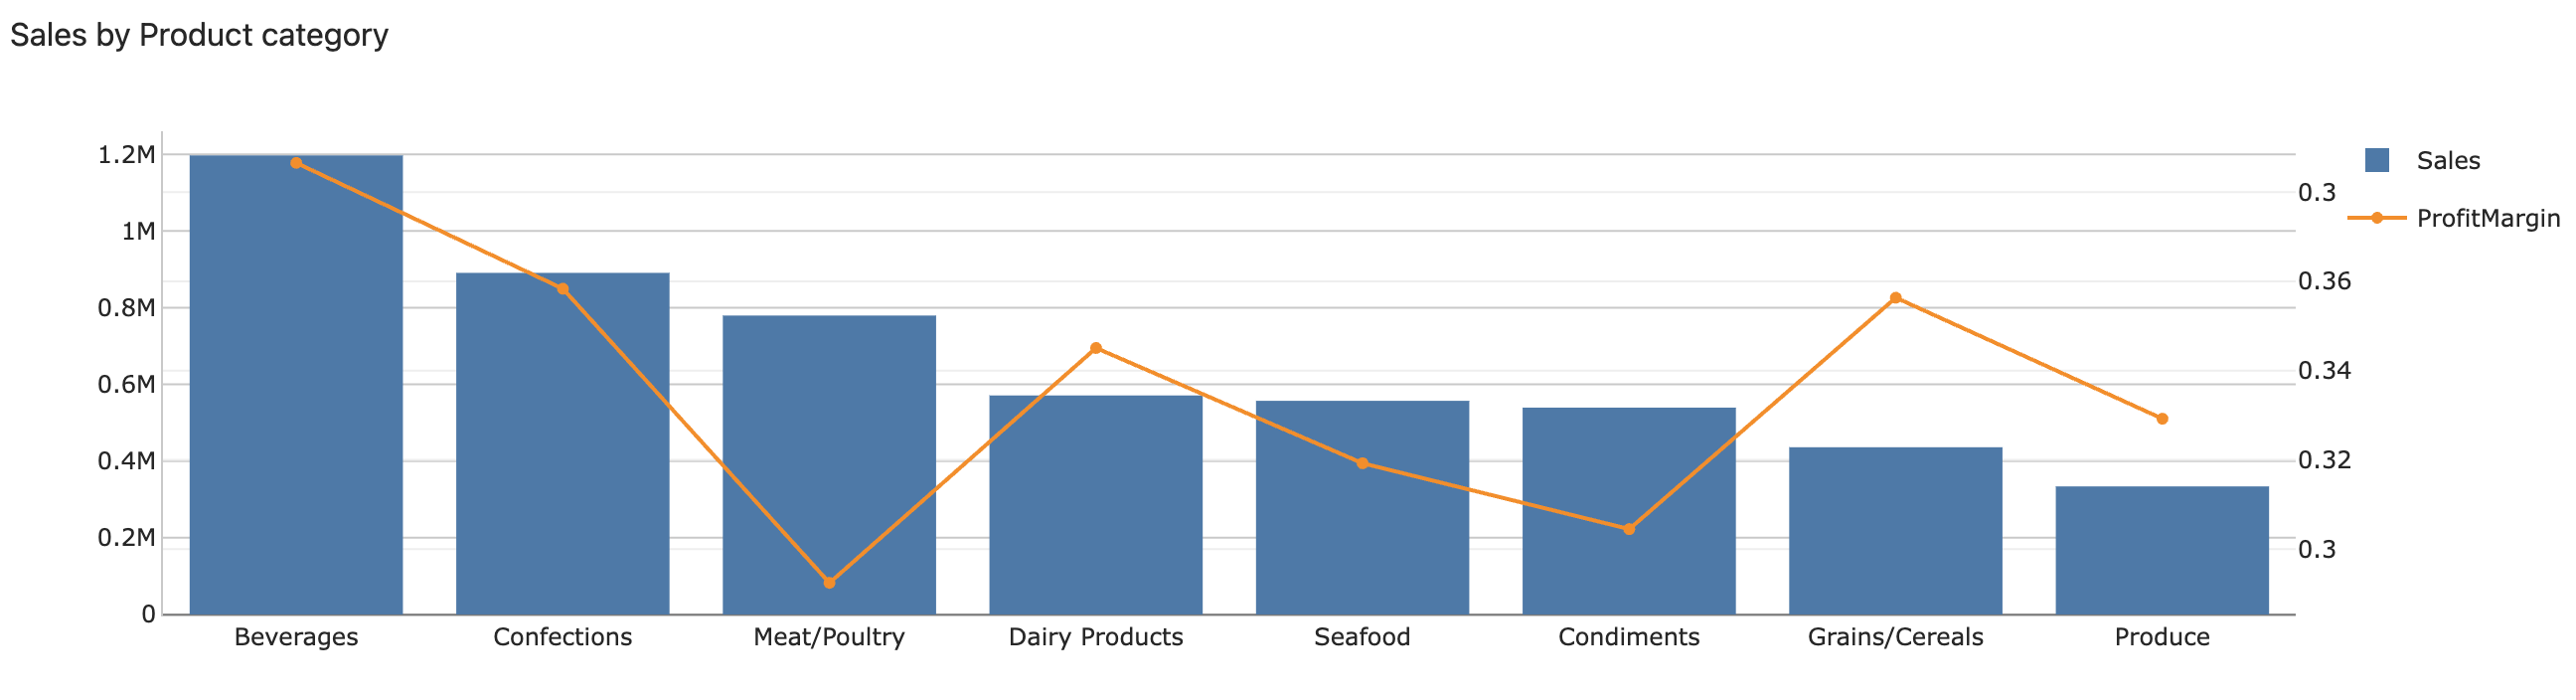

In [9]:
session.widget

## 2 Setting the story context

The price of Product X increased from \\$10 to \\$25. That's a 150% increase!  

And that's certainly headline news, but what is the context of this data?

If the time period is only one month it's an unacceptable increase (considering that the average inflation rate as of 2023 is 2.5%.)

If it happens over a span of 10 years, and assuming we have an [average inflation rate of 2.69% and cumulative inflation of 58.57%](https://smartasset.com/investing/inflation-calculator#mjuumacU7Q), the expected pricing should be approximately \$16. So the increase in price is still higher than expected.  

But if the time period is much longer, say 25 years, this increase will be inline with the inflation rate.  

From the example above, we see the importance of context. By presenting facts along with background information and the relevant details, we provide credibility to the magnitude of the figures. Your audience are more likely to understand the information better, and therefore stay engaged.  
And of course, you can highlight the context that you feel is most relevant to your data.

### 2.1 Setting the context with "When"  

With the "When" question, we explore timelines.  

As we have seen in the previous example, providing context with time is important in helping the audience understand the sequence and duration of events.  
That said, we come back with the following considerations that involves time: 
- [period of relevance](#2.1.1-Period-of-relevance)
- [trend intervals](#2.1.2-Trend-Intervals)


#### 2.1.1 Period of relevance  

Some questions we can ask: 
- What is the timeline we are looking at? 
- Are 10 year-old data still relevant to us now?  
- Are we trying to forecast our sales for the coming week, month or year?  

Considering the period of relevance will help to streamline our data and let users focus on the important timeframe.  

#### 2.1.2 Trend Intervals

**Trends**  

Some common questions asked when we are presented with a timeline:  
- How has the data changed over time?  For example, is purchase price rising or falling? 
- Is the change consistent or with periodic fluctuations?  
- What can possibly cause the hikes or dips during a certain period of time?

This is where we make use of trends to discover patterns and trigger further investigation to understand certain phenomenon.  
Trends help us understand the general direction of a certain phenomenon and the rate of change.  
We can then look at the events that happen around the period of interest to find a way to mitigate the downward trend if necessary, or boost the trend further if it's already upward.  

Trends can also be used to make predictions about the future of the observed phenomenon. For instance, if we observe an upward trend in the sales of bicycles, we should be prepared for increased demands in bicycle accessories as well.   

**Trend Intervals**  

But when we look at trends, we need to determine the intervals that will bring the most value to us.  
Do we need hourly, daily, weekly or monthly trends?  

A couple of factors that affects the trend intervals:    
- the granularity of the data captured: if we capture orders by dates without timestamps, we cannot provide hourly trends.  
- type of analysis we do: if we want to know if the popularity of certain products are seasonal, it makes sense to look at monthly or quarterly trends.  

Let's look at an example of trends using our sample dataset.  
We can easily derive sales trends by taking the difference between the sales of the current and previous day.

In [10]:
m["_previousSales"] = tt.shift(m["Sales"], h["OrderDate"], offset=-1)

m["SalesTrend"] = tt.where(
    ~m["_previousSales"].isnull(), m["Sales"] - m["_previousSales"]
)

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
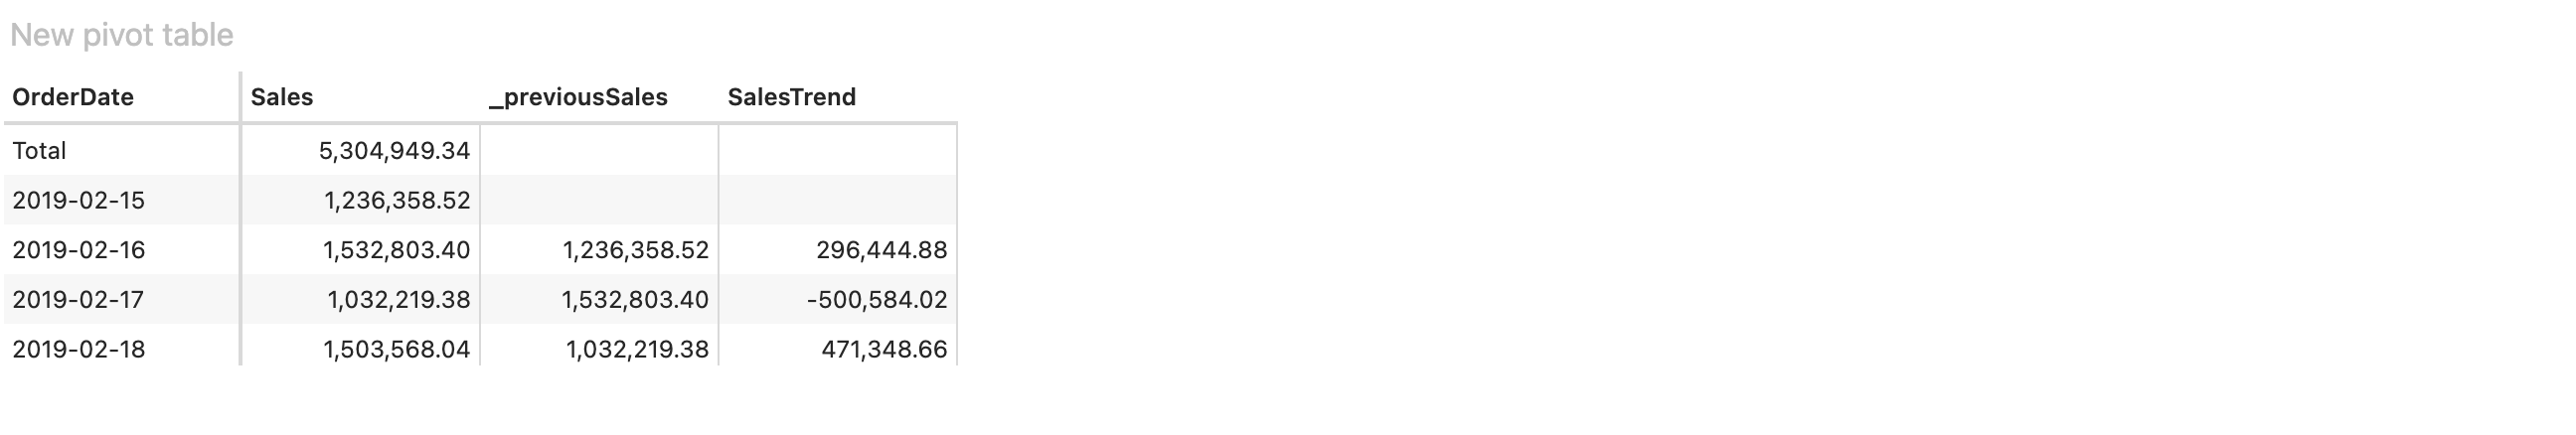

In [11]:
session.widget

Let's hide the interim measure `_previousSales` as it's not useful to end-users.

In [12]:
# hide technical measures
m["_previousSales"].visible = False

We can then choose a visualization that best present the trend to end users.  

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
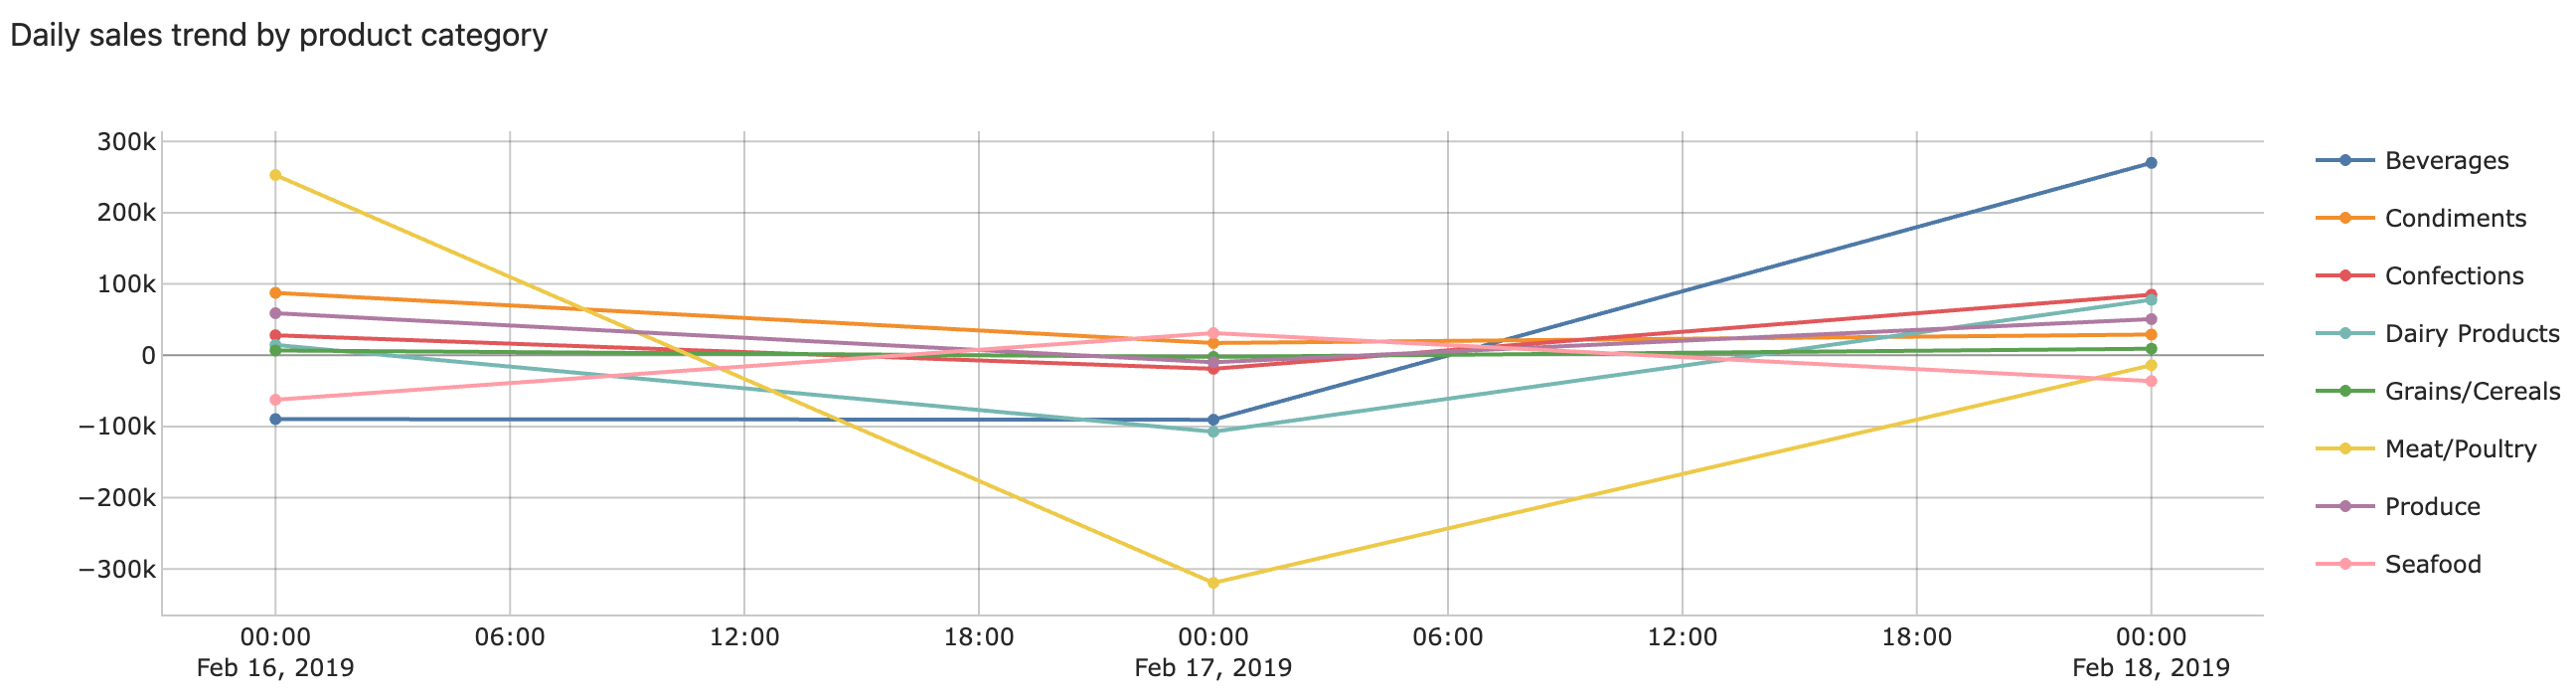

In [13]:
session.widget

We can see a huge dip in the trend for Meat/Poultry on 17th Feb but it started increasing again after. There could be factors causing this dip that is worth investigating.  
We will come back to this later on.  

#### 📐Exercise  

The above visualization split the sales trend by product category. Try viewing the sales trend by region instead.

#### 📖 Solution

Uncomment and run the next cell for the solution. 

In [14]:
# session.widget

### 2.2 Setting the context with "Where"

"Where" usually refers to locations. It works well in answering questions such as the following:  
- Are there global differences in the data?  
- Which country is outperforming the others?  
- Which local area (shop, town, county) is improving?  

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
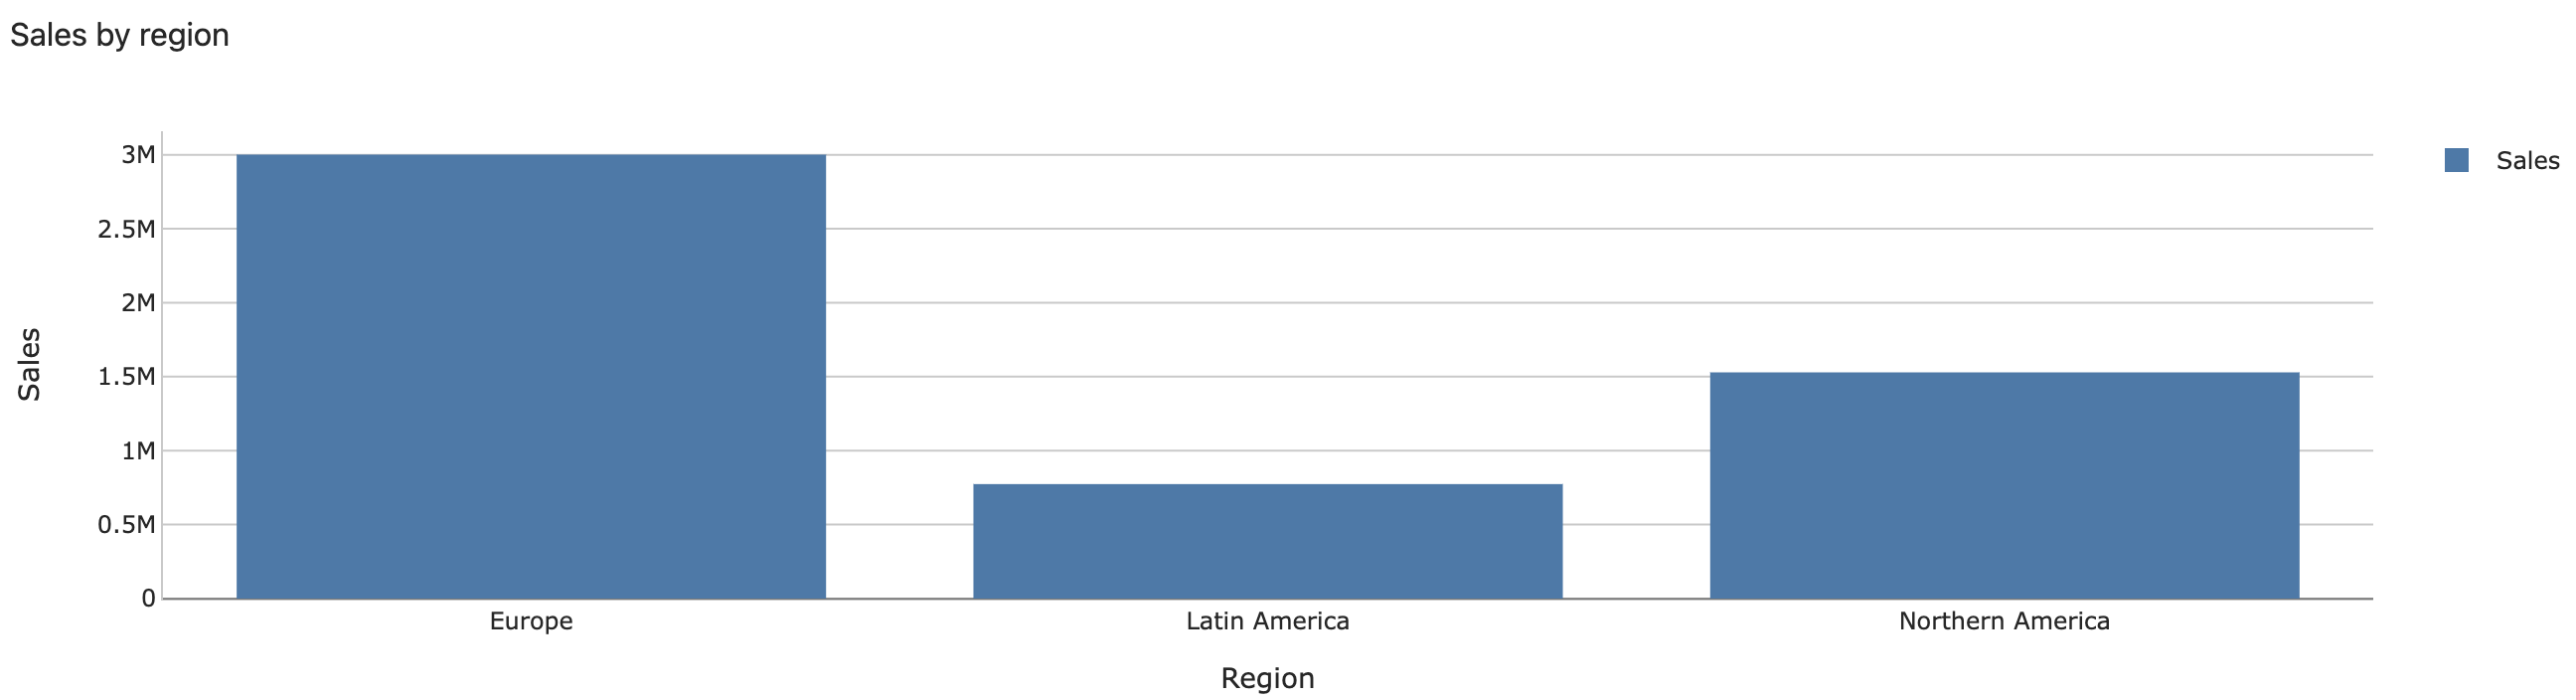

In [15]:
session.widget

You probably noticed that the questions are more of "Which" than "Where". The answer can somewhat be an entity rather than a location, as in the case of shop.  

Let's twist the "Where" question a little to fit our data context better.  
Instead of positioning it as a question on location, let's treat it as the `where` clause in [SQL](https://en.wikipedia.org/wiki/SQL) (Structured Query Language for querying databases) or [MDX](https://learn.microsoft.com/en-us/analysis-services/multidimensional-models/mdx/mdx-query-the-basic-query?view=asallproducts-allversions) (Multidimensional Expressions for querying OLAP cubes).  

Now, the questions that we can answer can be more target focused. For instance, for a manager who manages the European market, we can filter our data to reflect only the countries under his charge.   

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
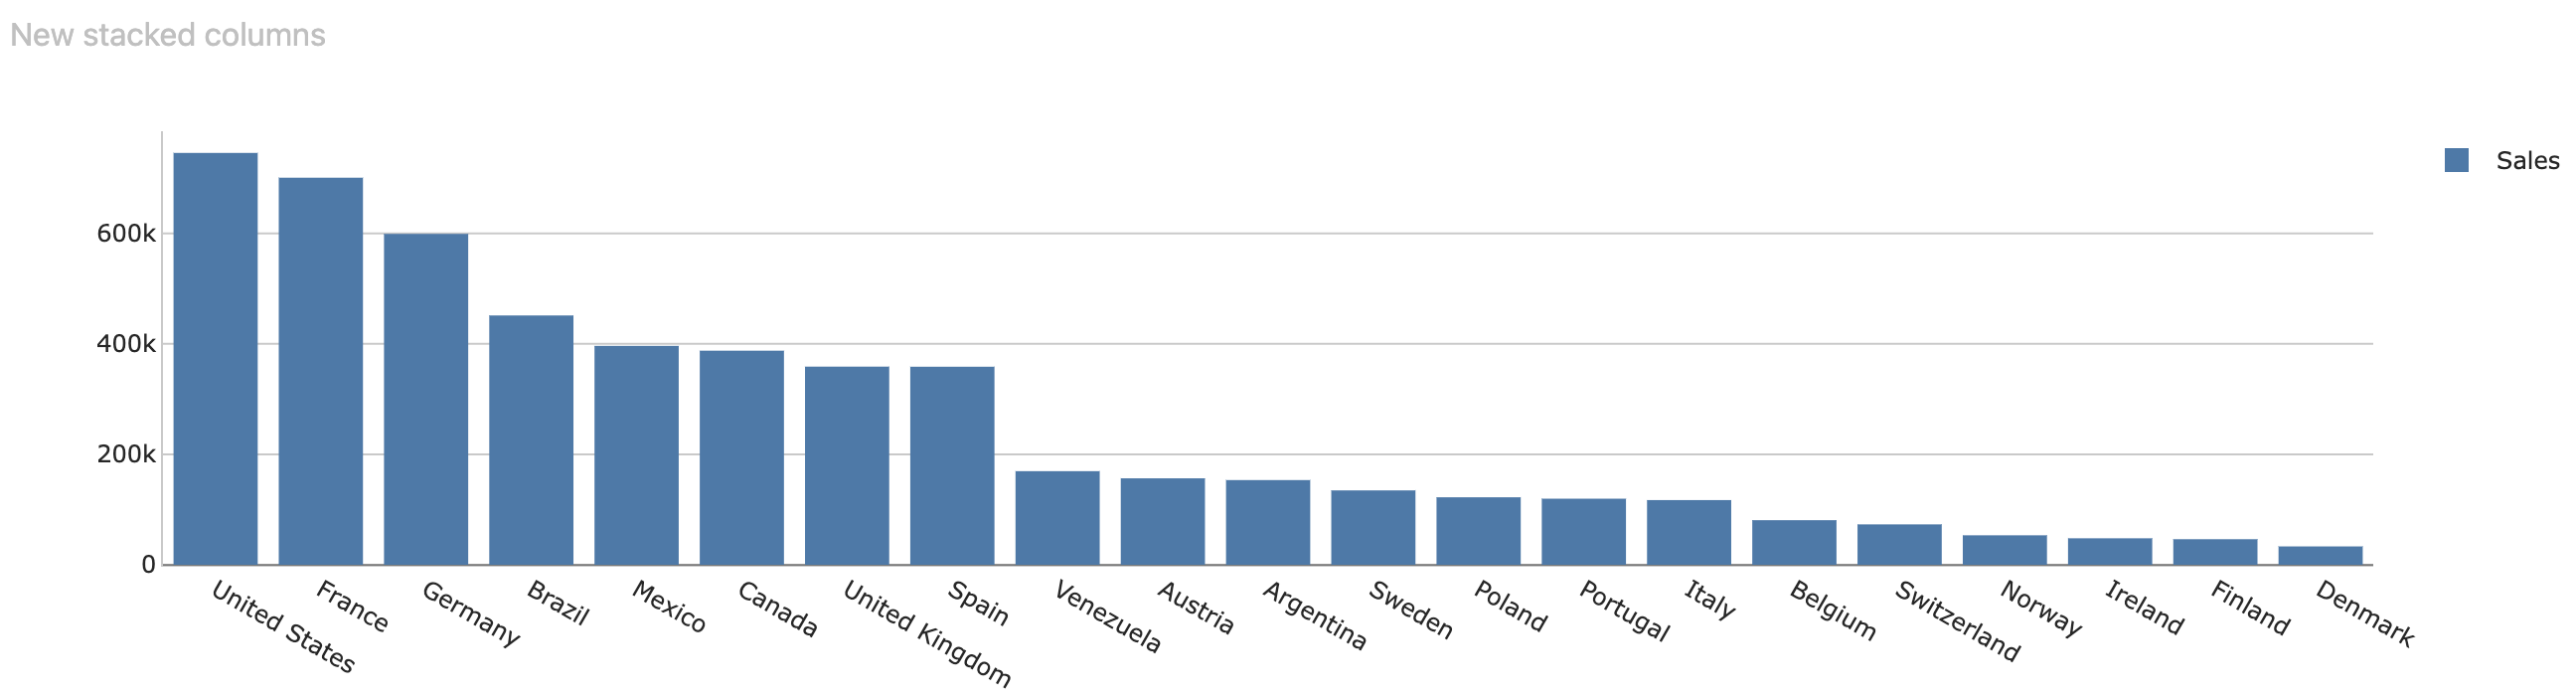

In [16]:
session.widget

Also, we can answer questions regarding the top/bottom performance, e.g. the top 5 products in the top 3 product categories with the highest sales.  

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
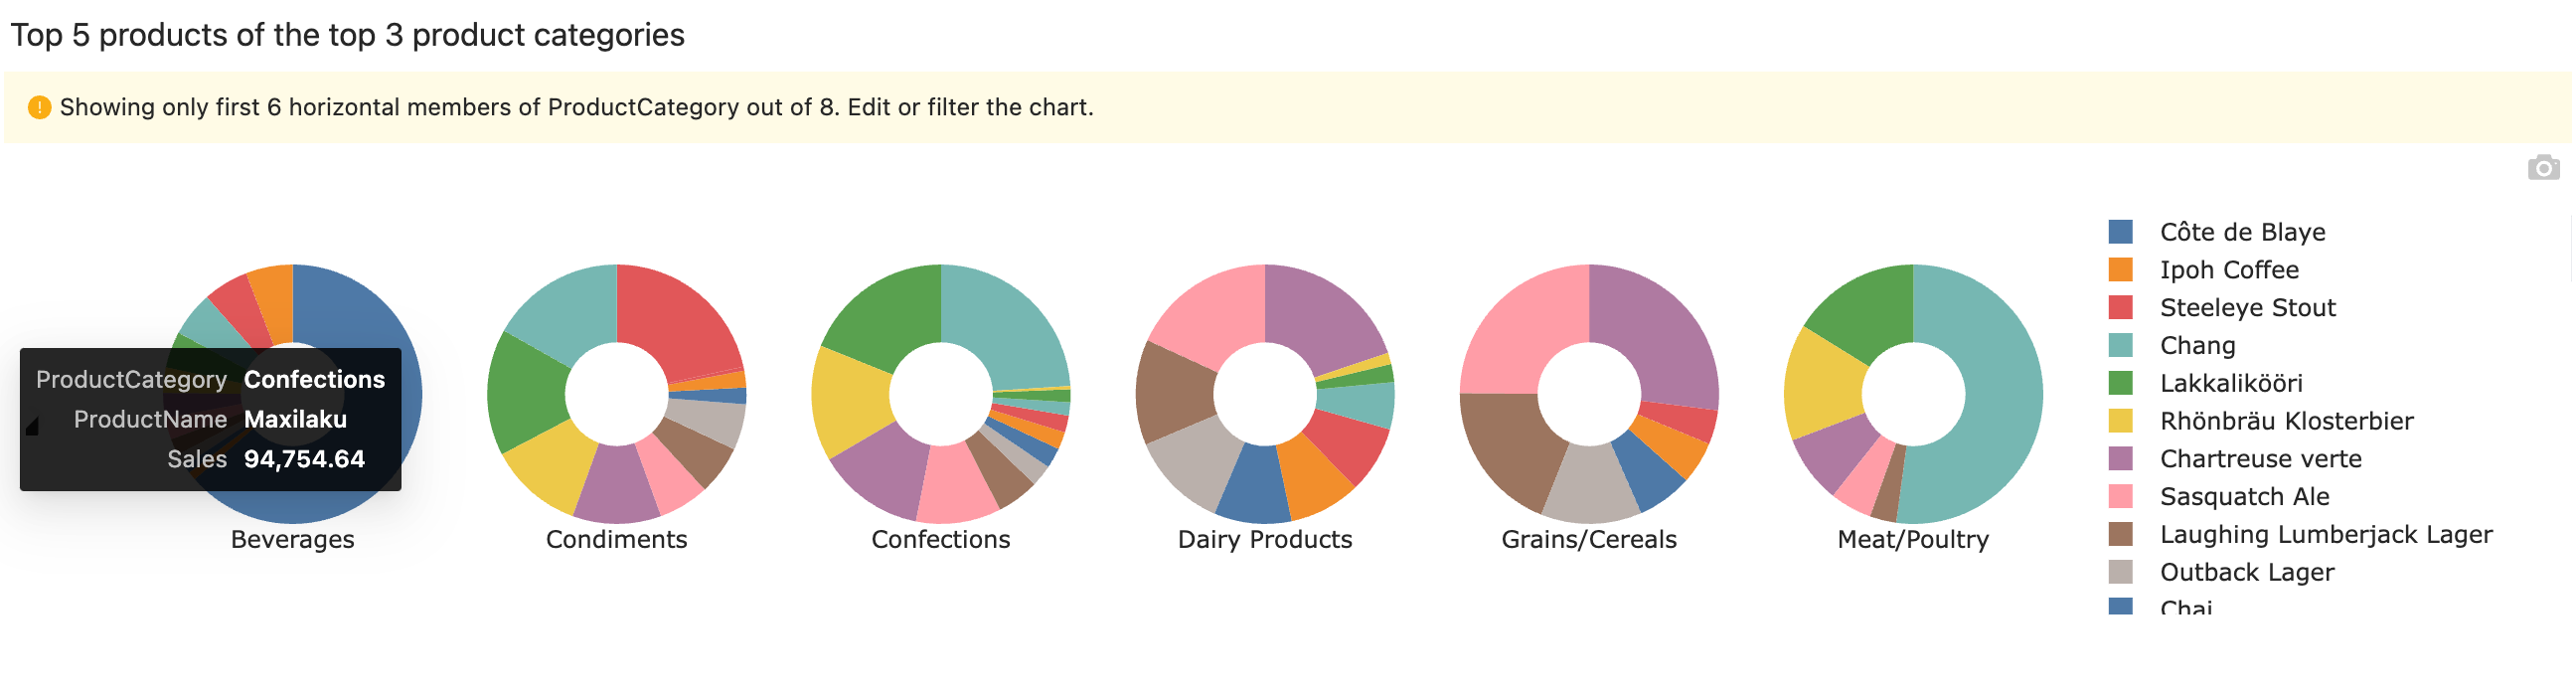

In [17]:
session.widget

# Quick recap

In this first section on data storytelling we've seen how to think about the context and the purpose of your story and data.

Who: Who is my audience, who needs to know?

What: What information do they need to know?  What decisions are they trying to make?  What insights do they need?

When: Which time period should be considered?  Should data be analysed by day, by week, by month, by year?

Where: Where should I look for data (geographical zones, SQL queries, MDX)

In the second section, we will focus on how to present your data so that it's easier for your audience to follow your narrative.